In [26]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import train_test_split

iris = load_iris()
X = iris.data
Y = iris.target
clf = BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=5)
clf_2 = DecisionTreeClassifier()

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.5)

In [25]:
print (X_train.shape)
print (X_test.shape)

(75, 4)
(75, 4)


In [27]:
clf.fit(X_train, y_train)
clf_2.fit(X_train, y_train)

DecisionTreeClassifier()

In [28]:
print (clf.score(X_train, y_train) )
print (clf_2.score(X_train, y_train) )

0.9866666666666667
1.0


In [29]:
print (clf.score(X_test, y_test) )
print (clf_2.score(X_test, y_test) )

0.9333333333333333
0.8933333333333333


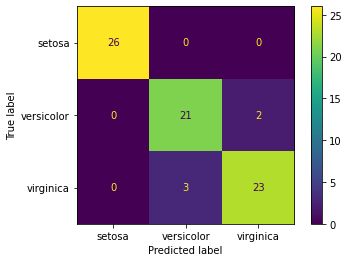

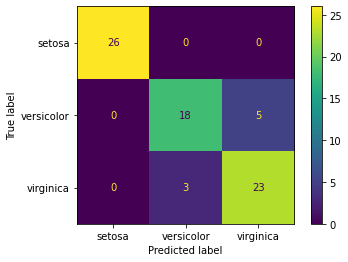

In [30]:
from sklearn.metrics import ConfusionMatrixDisplay
target_names = iris.target_names
y_pred = clf.predict(X_test)
y_pred_2 = clf_2.predict(X_test)
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, display_labels=target_names)
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_2, display_labels=target_names)

In [32]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.ensemble import HistGradientBoostingClassifier

iris = load_iris()
X = iris.data
Y = iris.target
clf = HistGradientBoostingClassifier()

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.5)

In [39]:
clf.fit(X_train, y_train)

HistGradientBoostingClassifier()

In [40]:
clf.score(X_train, y_train)

1.0

In [41]:
clf.score(X_test, y_test)

0.9066666666666666

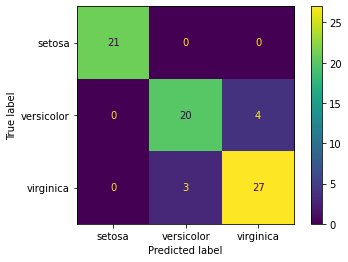

In [42]:
from sklearn.metrics import ConfusionMatrixDisplay
target_names = iris.target_names
y_pred = clf.predict(X_test)
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, display_labels=target_names)

In [43]:
pip install xgboost

     -------------------------------------- 106.6/106.6 MB 7.0 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [45]:
import pandas as pd
from sklearn.metrics import mean_absolute_percentage_error, mean_absolute_error

df = pd.read_csv("diamonds.csv", index_col=0)
df


,carat,cut,color,clarity,depth,table,price,x,y,z
1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53936,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53937,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53938,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53939,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


In [47]:
Y = df['price']

In [52]:
Y

1         326
2         326
3         327
4         334
5         335
         ... 
53936    2757
53937    2757
53938    2757
53939    2757
53940    2757
Name: price, Length: 53940, dtype: int64

In [50]:
X = df.loc[:, ~df.columns.isin( ['price'] ) ]

In [51]:
X

,carat,cut,color,clarity,depth,table,x,y,z
1,0.23,Ideal,E,SI2,61.5,55.0,3.95,3.98,2.43
2,0.21,Premium,E,SI1,59.8,61.0,3.89,3.84,2.31
3,0.23,Good,E,VS1,56.9,65.0,4.05,4.07,2.31
4,0.29,Premium,I,VS2,62.4,58.0,4.20,4.23,2.63
5,0.31,Good,J,SI2,63.3,58.0,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...
53936,0.72,Ideal,D,SI1,60.8,57.0,5.75,5.76,3.50
53937,0.72,Good,D,SI1,63.1,55.0,5.69,5.75,3.61
53938,0.70,Very Good,D,SI1,62.8,60.0,5.66,5.68,3.56
53939,0.86,Premium,H,SI2,61.0,58.0,6.15,6.12,3.74


In [53]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

In [55]:
print (X_train.shape)
print (X_test.shape)

(43152, 9)
(10788, 9)


In [57]:
categorical_columns = [ 'cut', 'color', 'clarity' ]

In [58]:
from sklearn.linear_model import Ridge


clf = Ridge(alpha=1.0)
clf.fit(X_train.loc[:, ~X_train.columns.isin( categorical_columns ) ], y_train)

Ridge()

In [61]:

y_pred = clf.predict(X_train.loc[:, ~X_train.columns.isin( categorical_columns ) ])
print ('MAPE', mean_absolute_percentage_error(y_train, y_pred) )

print ('MAE', mean_absolute_error(y_train, y_pred) )

MAPE 0.27857186833640085
MAE 885.7689538332434


In [59]:
clf.score(X_train.loc[:, ~X_train.columns.isin( categorical_columns ) ], y_train)

0.8595674068487431

In [62]:
clf.score(X_test.loc[:, ~X_test.columns.isin( categorical_columns ) ], y_test)

0.8577499659792269

In [63]:

y_pred = clf.predict(X_test.loc[:, ~X_test.columns.isin( categorical_columns ) ])
print ('MAPE', mean_absolute_percentage_error(y_test, y_pred) )

print ('MAE', mean_absolute_error(y_test, y_pred) )

MAPE 0.2748162153404146
MAE 893.9224045960435


In [66]:
from sklearn.svm import SVR
svr_clf = SVR()
svr_clf.fit(X_train.loc[:, ~X_train.columns.isin( categorical_columns ) ], y_train)

SVR()

In [67]:
y_pred = svr_clf.predict(X_train.loc[:, ~X_train.columns.isin( categorical_columns ) ])
print ('MAPE', mean_absolute_percentage_error(y_train, y_pred) )

print ('MAE', mean_absolute_error(y_train, y_pred) )

MAPE 1.06343603561814
MAE 2748.4850086906035


In [68]:
y_pred = svr_clf.predict(X_test.loc[:, ~X_test.columns.isin( categorical_columns ) ])
print ('MAPE', mean_absolute_percentage_error(y_test, y_pred) )

print ('MAE', mean_absolute_error(y_test, y_pred) )

MAPE 1.0622856691966258
MAE 2806.0897398850825


In [102]:
from sklearn.neighbors import KNeighborsRegressor
neigh = KNeighborsRegressor(n_neighbors=19, weights='distance' )
neigh.fit(X_train.loc[:, ~X_train.columns.isin( categorical_columns ) ], y_train)

KNeighborsRegressor(n_neighbors=19, weights='distance')

In [103]:
y_pred = neigh.predict(X_train.loc[:, ~X_train.columns.isin( categorical_columns ) ])
print ('MAPE', mean_absolute_percentage_error(y_train, y_pred) )

print ('MAE', mean_absolute_error(y_train, y_pred) )

MAPE 0.011851224353809524
MAE 18.32294072337871


In [104]:
y_pred = neigh.predict(X_test.loc[:, ~X_test.columns.isin( categorical_columns ) ])
print ('MAPE', mean_absolute_percentage_error(y_test, y_pred) )

print ('MAE', mean_absolute_error(y_test, y_pred) )

MAPE 0.2040589084220625
MAE 795.4754237677704
